In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,183.0,455.366120,247.052476,2.00,263.5,457.0,676.0,890.0000
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292


In [6]:
df.drop(['PassengerId', 'Name', 'Fare', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
1,1,1,female,38.0,1,0,C85,C
3,1,1,female,35.0,1,0,C123,S
6,0,1,male,54.0,0,0,E46,S
10,1,3,female,4.0,1,1,G6,S
11,1,1,female,58.0,0,0,C103,S


In [7]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
1,1,1,0,38.0,1,0,72,0
3,1,1,0,35.0,1,0,48,2
6,0,1,1,54.0,0,0,117,2
10,1,3,0,4.0,1,1,131,2
11,1,1,0,58.0,0,0,43,2


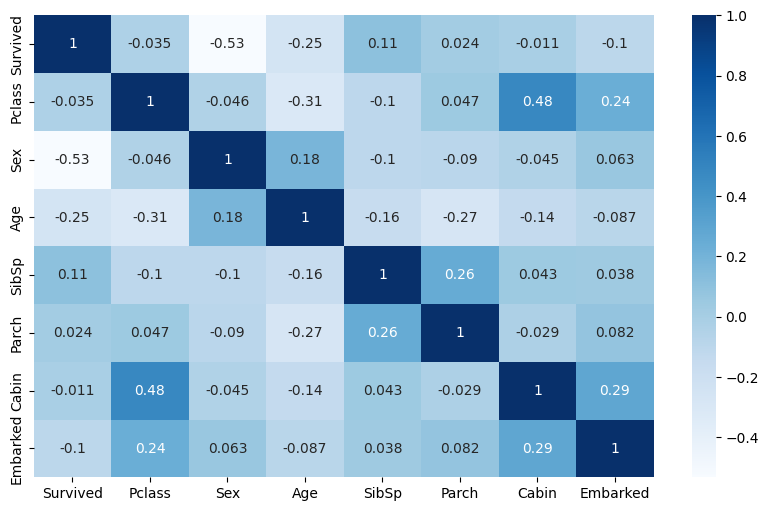

In [9]:
cor = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, cmap="Blues", annot=True);

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df.shape

(154, 8)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rfc = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=150, random_state=42)

In [16]:
y_pred_rfc = rfc.predict(X_test)

In [17]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rfc)*100:.4f}%")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_rfc)}")

Accuracy Score: 90.3226%

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.87      0.93        23

    accuracy                           0.90        31
   macro avg       0.86      0.93      0.89        31
weighted avg       0.93      0.90      0.91        31



In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred_knn = knn.predict(X_test)

In [20]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_knn)*100:.4f}%")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_knn)}")

Accuracy Score: 90.3226%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.92      0.96      0.94        23

    accuracy                           0.90        31
   macro avg       0.89      0.85      0.87        31
weighted avg       0.90      0.90      0.90        31



In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred_dtc = dtc.predict(X_test)

In [23]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_dtc)*100:.4f}%")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_dtc)}")

Accuracy Score: 83.8710%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.91      0.87      0.89        23

    accuracy                           0.84        31
   macro avg       0.79      0.81      0.80        31
weighted avg       0.85      0.84      0.84        31

